In [18]:
%matplotlib inline

import collections
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [19]:
used_car = pd.read_csv("output/used_cars.csv")

In [20]:
used_car.describe()

year      odometer     latitude    longitude    cylinders  \
count  9306.000000  8.540000e+03  7221.000000  7221.000000  9306.000000   
mean   2006.368042  1.131937e+05    37.707383  -122.012114     5.641629   
std       6.215687  1.681794e+05     0.632460     1.603597     1.574441   
min    1990.000000  0.000000e+00    25.859400  -123.770300     3.000000   
25%    2002.000000  5.603425e+04    37.372579  -122.357655     4.000000   
50%    2007.000000  1.020000e+05    37.665800  -122.050873     6.000000   
75%    2012.000000  1.515530e+05    37.957500  -121.914854     6.000000   
max    2018.000000  9.659000e+06    47.678310   -73.909900    12.000000   

              price  
count  9.306000e+03  
mean   1.166607e+04  
std    2.214733e+04  
min    5.000000e+02  
25%    3.800000e+03  
50%    7.900000e+03  
75%    1.495600e+04  
max    1.588800e+06

In [21]:
used_car = used_car.dropna(subset=['odometer'])
used_car = used_car.drop(['latitude', 'longitude', 'post_url'], axis=1)
used_car.describe()

year      odometer    cylinders         price
count  8540.000000  8.540000e+03  8540.000000  8.540000e+03
mean   2006.592857  1.131937e+05     5.631616  1.197607e+04
std       6.168301  1.681794e+05     1.569227  2.288424e+04
min    1990.000000  0.000000e+00     3.000000  5.000000e+02
25%    2002.000000  5.603425e+04     4.000000  4.000000e+03
50%    2007.000000  1.020000e+05     6.000000  8.000000e+03
75%    2012.000000  1.515530e+05     6.000000  1.500000e+04
max    2018.000000  9.659000e+06    12.000000  1.588800e+06

In [31]:
########## Add Feature #################

In [42]:
import time
import datetime

# mileage per year
max_year = used_car['year'].max() + 1
used_car['miles_per_year'] = used_car['odometer'].astype('float') / (max_year - used_car['year'])
# posted_at without time zone
used_car['posted_at'] = used_car['posted_at'].apply(lambda x: time.mktime(datetime.datetime.strptime(x[:-6], "%Y-%m-%dT%H:%M:%S").timetuple())) 

In [43]:
########## Train and Test Data #########

In [44]:
# use all sample to train data
mask = np.random.rand(len(used_car)) < 1.0

In [45]:
train = used_car[mask]
test = used_car[~mask]
print('train: %d, test: %d' % (len(train), len(test)))

train: 8540, test: 0


In [46]:
# remove outliers
def remove_outliers(df, fields, k=3):
    if not isinstance(fields, list):
        fields = [fields]
    for field in fields:
        if isinstance(df, pd.DataFrame):
            df = df[np.abs(df[field] - df[field].mean()) <= (k * df[field].std())]
        elif isinstance(df, pd.Series):
            df = df[((df - df.mean()).abs() <= k * df.std())]
    return df

In [47]:
from sklearn.feature_selection import SelectKBest, f_classif

def make_model_select(X, make, model):
    fields = ['year', 'price', 'miles_per_year', 'odometer', 'color', 'category', 'condition', 'size', 'title_status', 'dealer', 'model', 'make', 'cylinders', 'drive', 'fuel']
    return X[(X['make_name'] == make) & (X['model_name'] == model)][fields]

# feature select function
def feature_select(train_data, predictors):
    # 特征选择
    selector = SelectKBest(f_classif, k=5)
    selector.fit(train_data[predictors], train_data['price'])

    # 得到每个特征列的p值，再转换为交叉验证得分
    scores = -np.log10(selector.pvalues_)

    # 绘制得分图像，观察哪个特征是坠好的
    plt.bar(range(len(predictors)), scores)
    plt.xticks(range(len(predictors)), predictors, rotation='vertical')
    plt.show()

In [48]:
########## Model ##########

make: mini, model: mini
0.303081013092


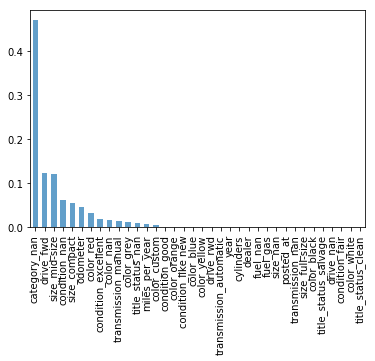

make: mini, model: cooper
0.794543263066


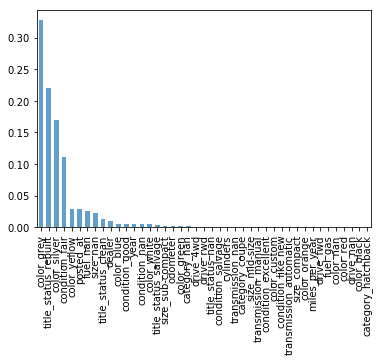

make: mini, model: clubman
-0.762941648483


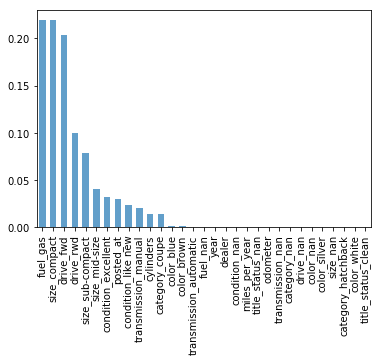

make: ram, model: 1500
-0.318967205192


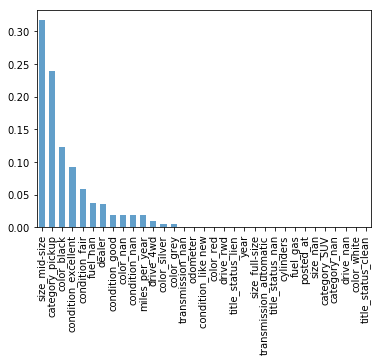

make: subaru, model: impreza
0.651518401745


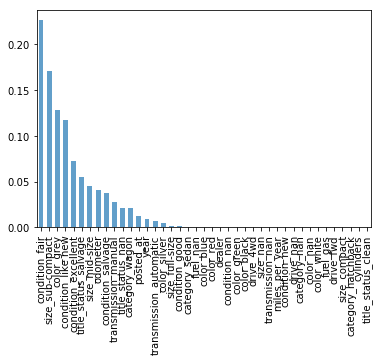

make: subaru, model: forester
0.903601582547


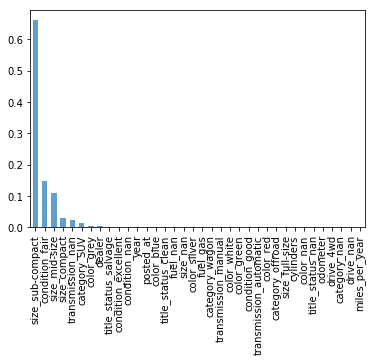

make: subaru, model: outback
0.909608886225


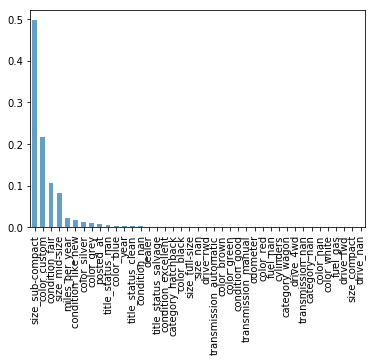

make: subaru, model: legacy
0.693627819201


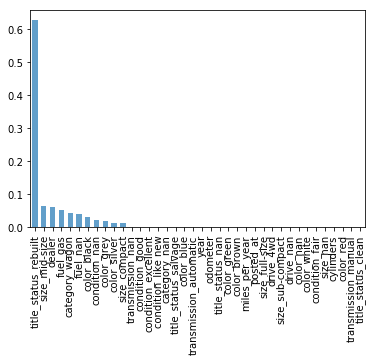

make: subaru, model: crosstrek
-0.567146140446


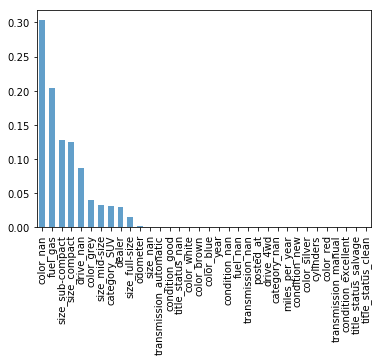

make: subaru, model: wrx
0.418741406613


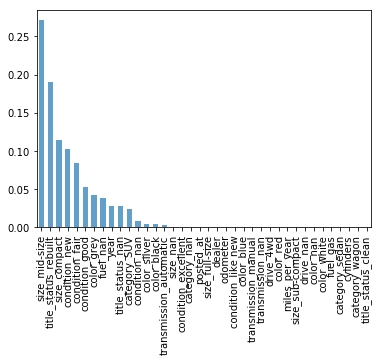

make: lexus, model: gs
0.919448714417


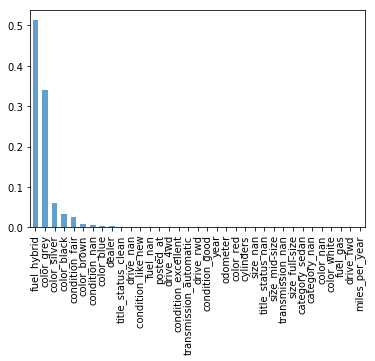

make: lexus, model: is
0.416660504652


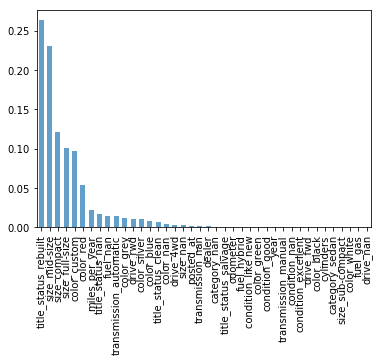

make: lexus, model: es
0.854355021665


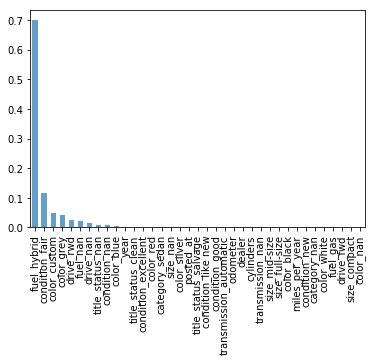

make: lexus, model: rx
0.918861569202


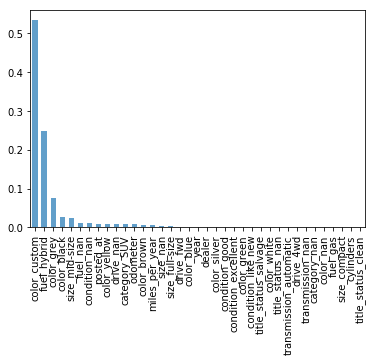

make: lexus, model: ls
-0.589135809212


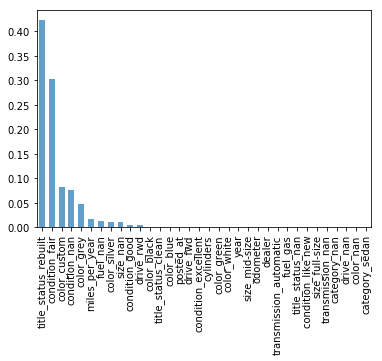

make: lexus, model: gs300
-0.35729571235


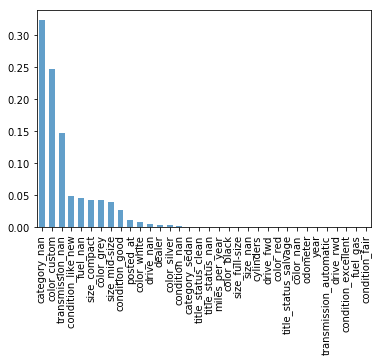

make: lexus, model: rx300
0.00830046443761


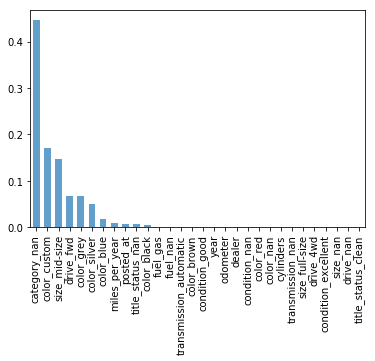

make: audi, model: q5
-1.72327269059


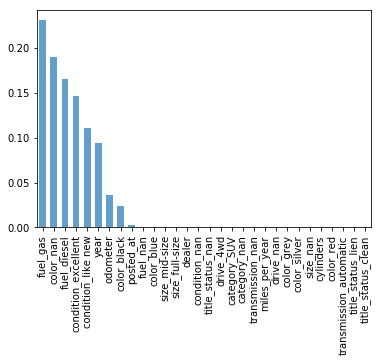

make: audi, model: quattro
0.820762536269


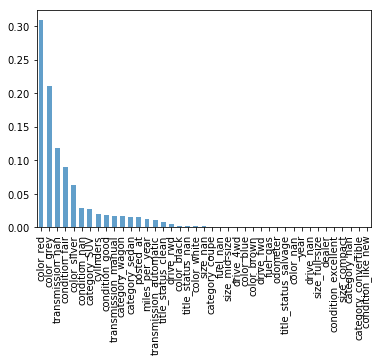

make: audi, model: s4
0.307211226535


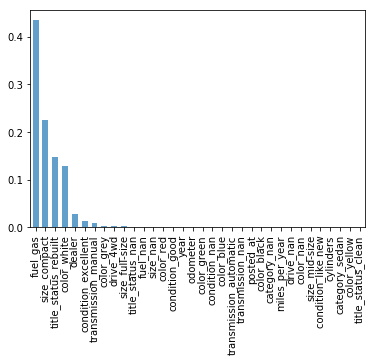

make: audi, model: a3
0.432701836894


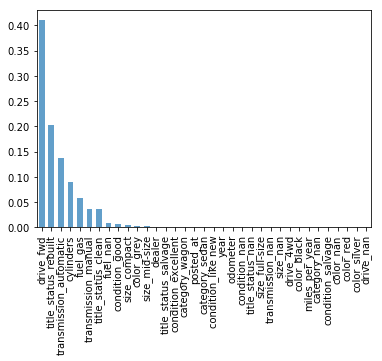

make: audi, model: a5
0.0737517473986


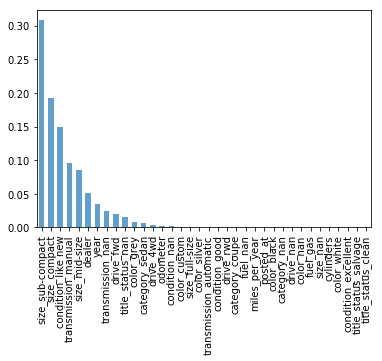

make: audi, model: a4
0.863546680835


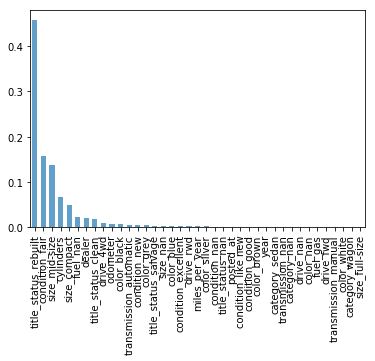

make: audi, model: a6
0.0127868754903


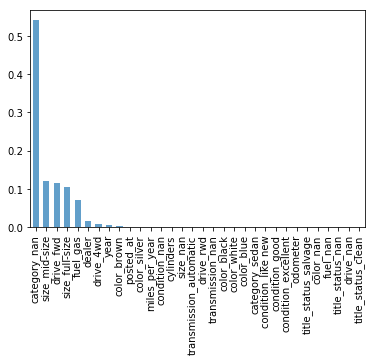

make: gmc, model: 1500
-0.112979946109


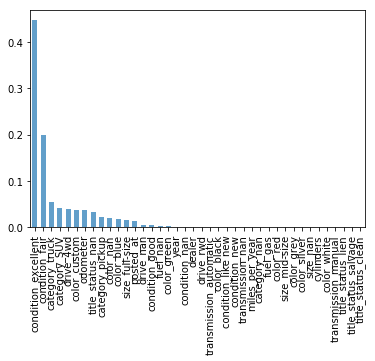

make: gmc, model: sierra
0.491723487493


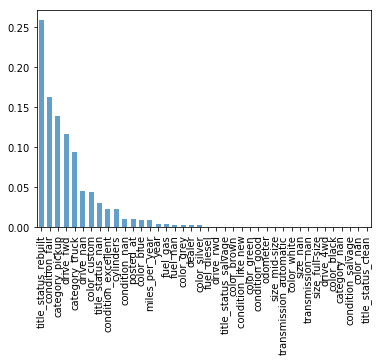

make: gmc, model: yukon
0.874880780418


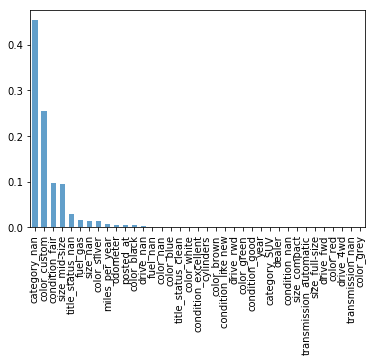

make: gmc, model: 2500
-3.09735515374


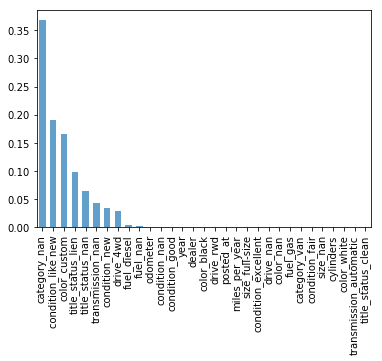

make: chevrolet, model: traverse
0.478069415824


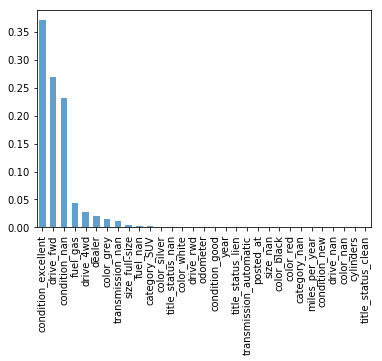

make: chevrolet, model: equinox
-0.396006234803


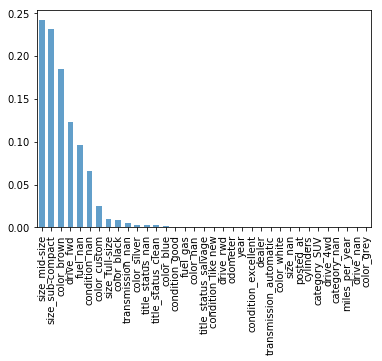

make: chevrolet, model: colorado
0.11834130479


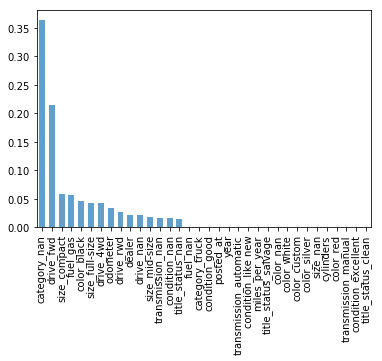

make: chevrolet, model: corvette
0.463693698943


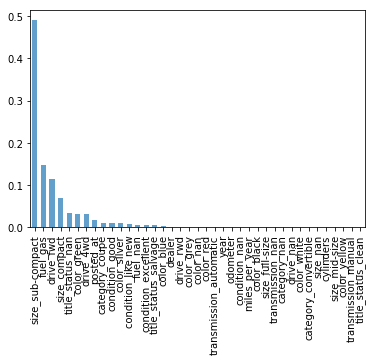

make: chevrolet, model: suburban
0.675489790115


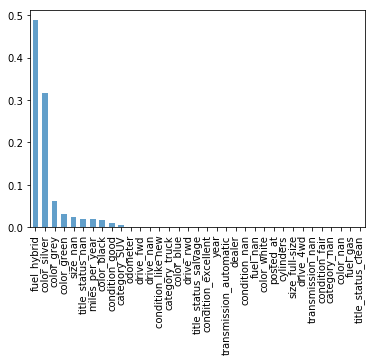

make: chevrolet, model: volt
0.550629223437


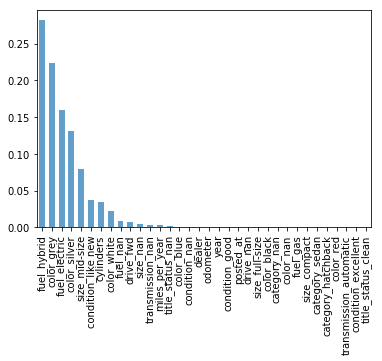

make: chevrolet, model: chevy
-0.585039907083


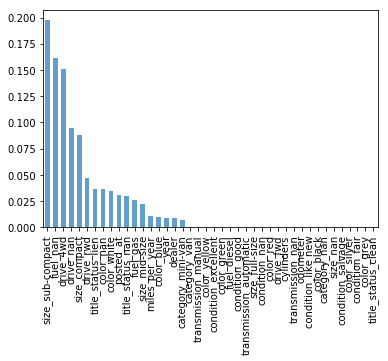

make: chevrolet, model: 1500
0.680911904625


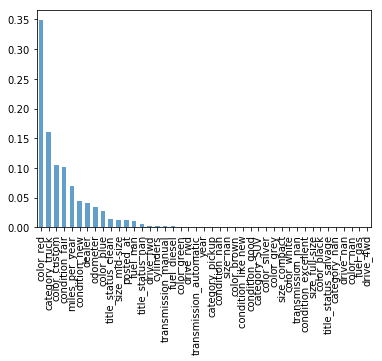

make: chevrolet, model: tahoe
-0.537113207022


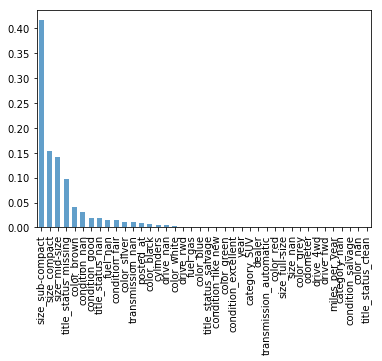

make: chevrolet, model: silverado
0.765209183811


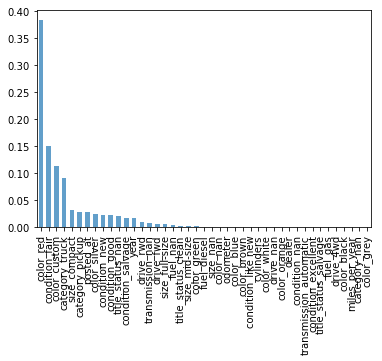

make: chevrolet, model: 2500
0.189617311804


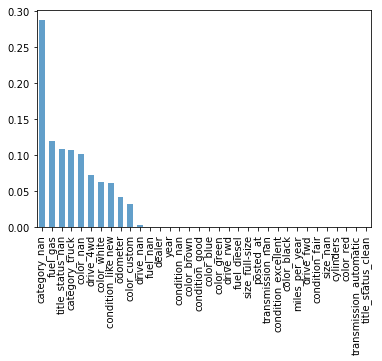

make: chevrolet, model: malibu
-2.96169371415


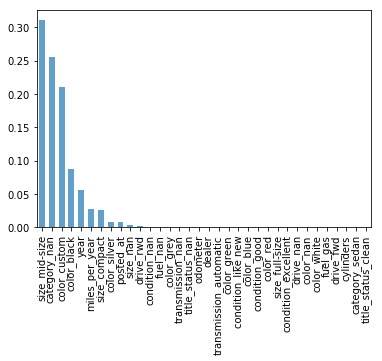

make: chevrolet, model: astro
-1.40016996782


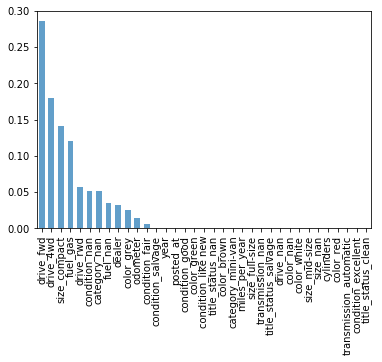

make: chevrolet, model: ss
-11.0521251165


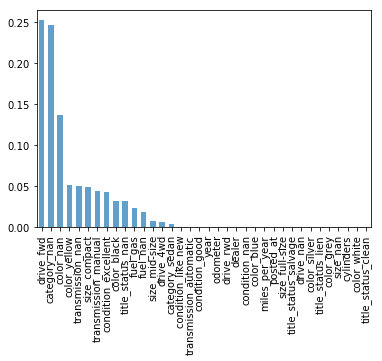

make: chevrolet, model: cruze
-2.06729115404


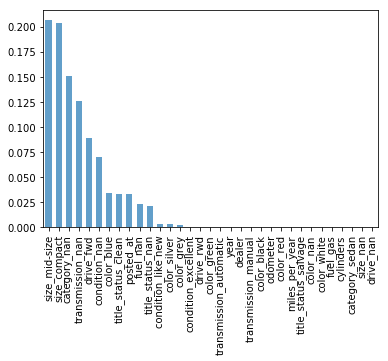

make: chevrolet, model: 3500
-0.231096054631


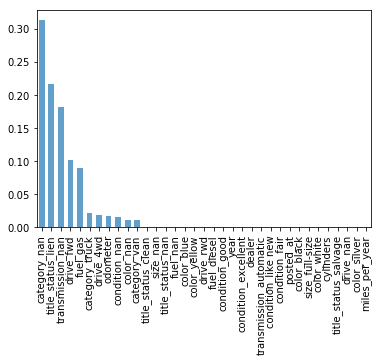

make: chevrolet, model: camaro
0.648741819008


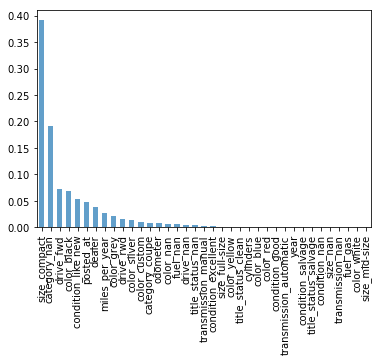

make: chevrolet, model: impala
0.230104271952


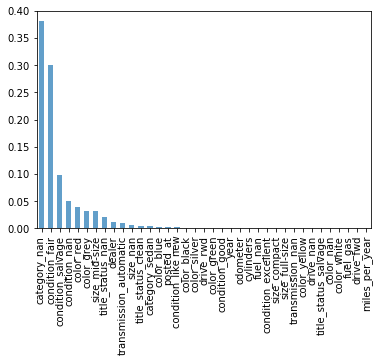

make: scion, model: tc
0.805517807575


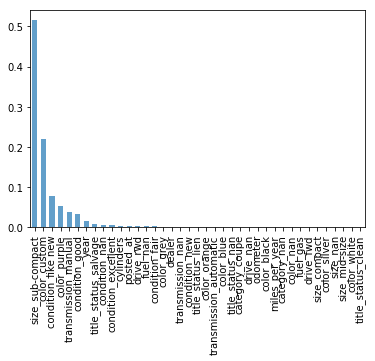

make: porsche, model: cayenne
0.685815427378


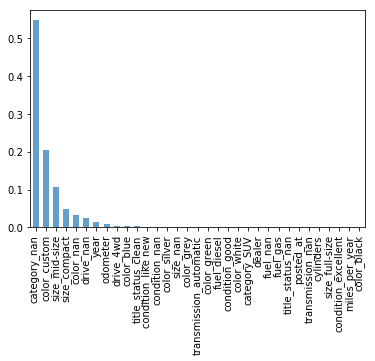

make: porsche, model: boxster
0.630171347714


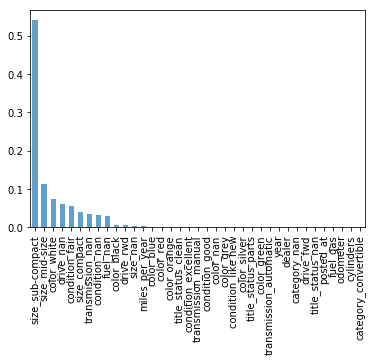

make: porsche, model: 911
0.163052893959


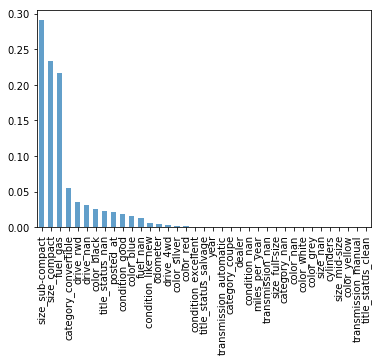

make: cadillac, model: cts
0.303386307093


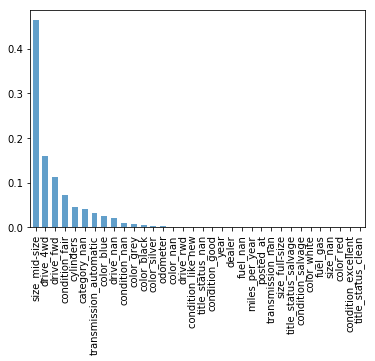

make: cadillac, model: escalade
0.816424035436


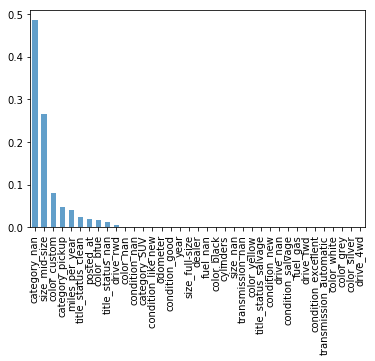

make: honda, model: accord
0.848150595947


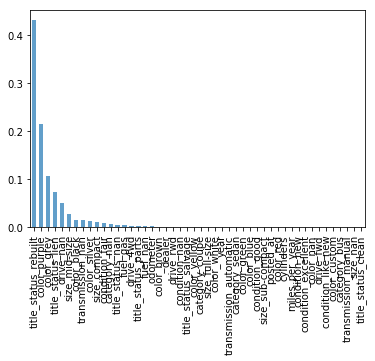

make: honda, model: fit
0.610257909103


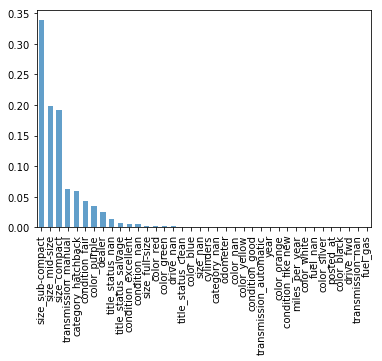

make: honda, model: cr-v
0.83059431605


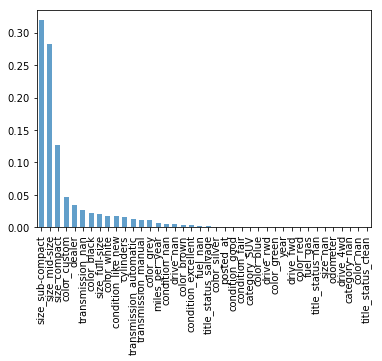

make: honda, model: civic
0.878822364411


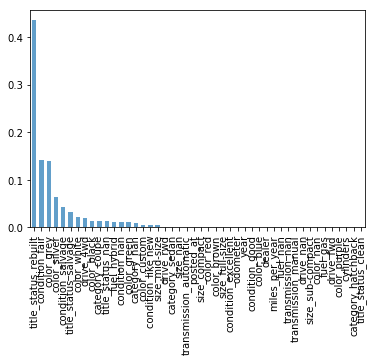

make: honda, model: odyssey
0.819298299094


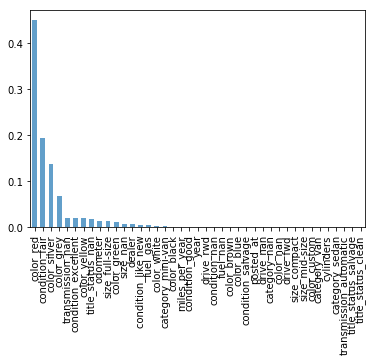

make: honda, model: pilot
0.911436641086


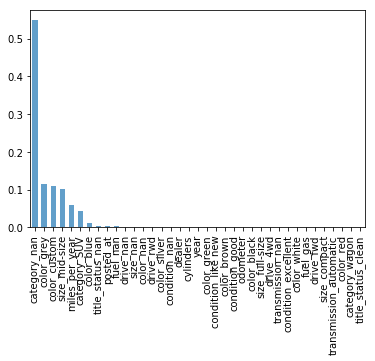

make: hyundai, model: santa-fe
-0.151182035445


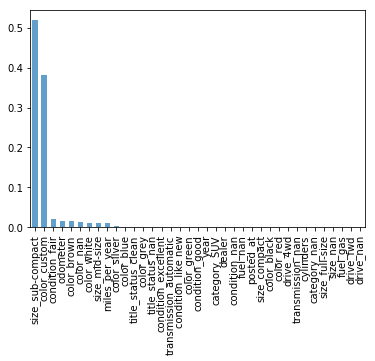

make: hyundai, model: sonata
0.66529119167


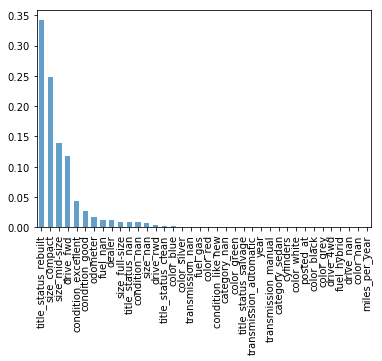

make: hyundai, model: accent
-10.1642331121


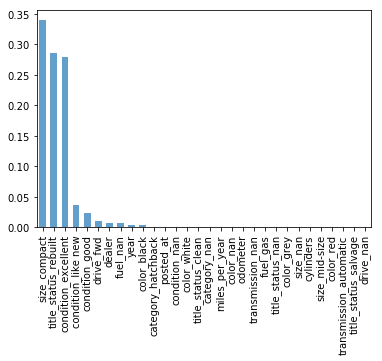

make: hyundai, model: elantra
0.443563173306


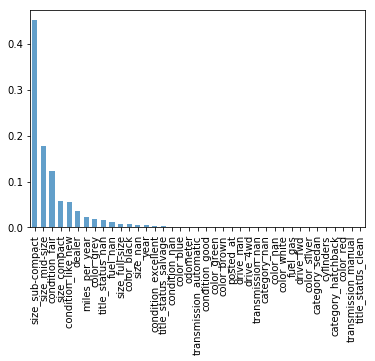

make: hyundai, model: genesis
0.257596591822


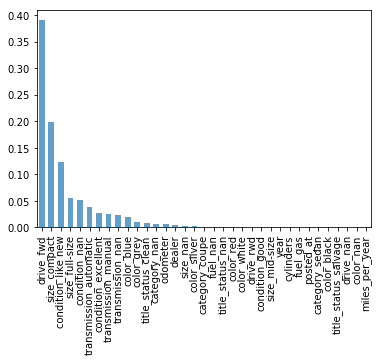

make: ford, model: gt
0.813459737265


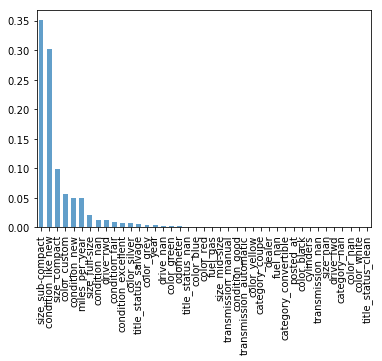

make: ford, model: expedition
0.441714863854


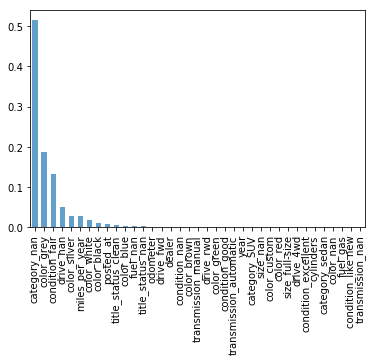

make: ford, model: transit
0.523607842007


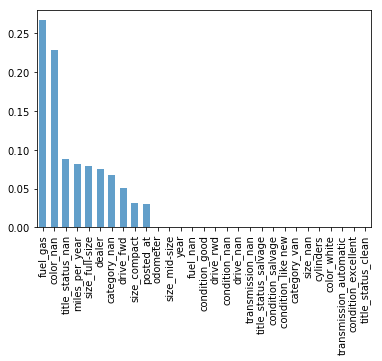

make: ford, model: focus
0.419056526235


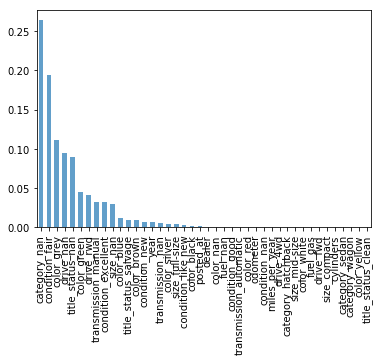

make: ford, model: escape
0.568042535981


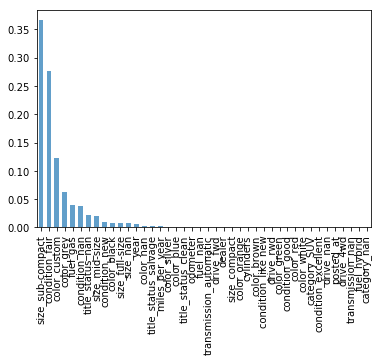

make: ford, model: mustang
0.709913507618


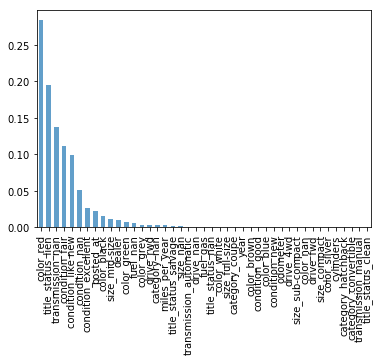

make: ford, model: crown-victoria
-0.0992097558374


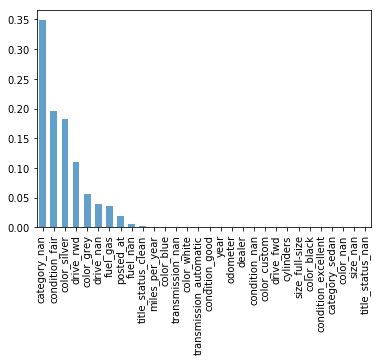

make: ford, model: flex
0.54234984382


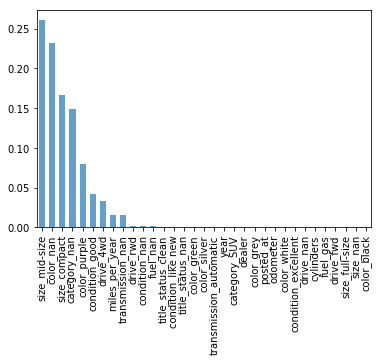

make: ford, model: explorer
0.914250291908


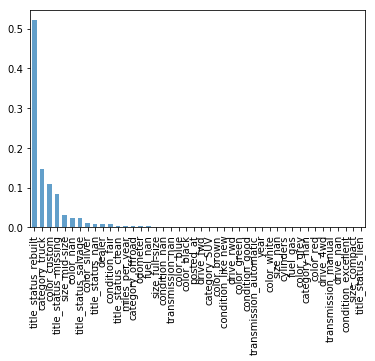

make: ford, model: f-350
0.187972589829


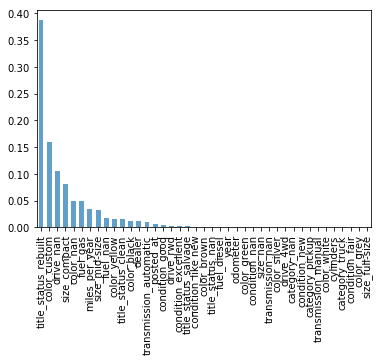

make: ford, model: e-350
0.35480826083


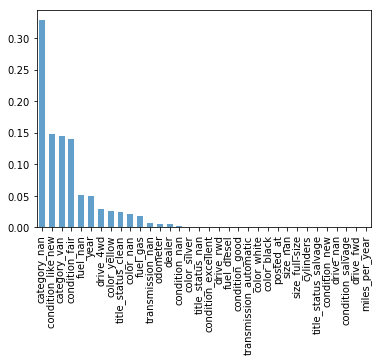

make: ford, model: fiesta
-1.02022756914


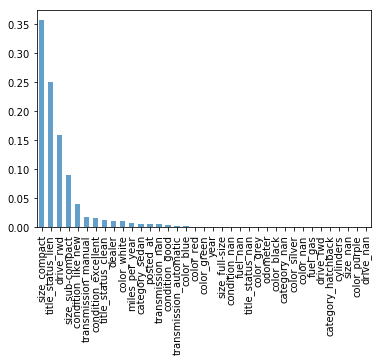

make: ford, model: ranger
0.544635222363


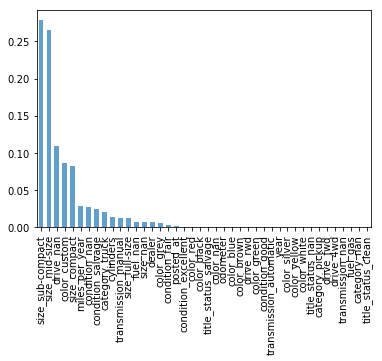

make: ford, model: fusion
0.621947165468


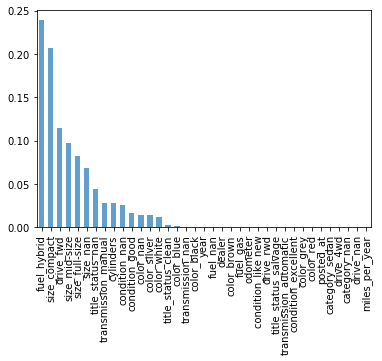

make: ford, model: taurus
0.902906299365


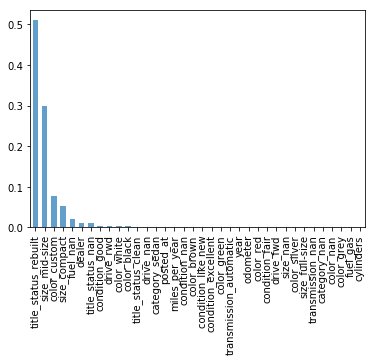

make: ford, model: f-250
0.743676336905


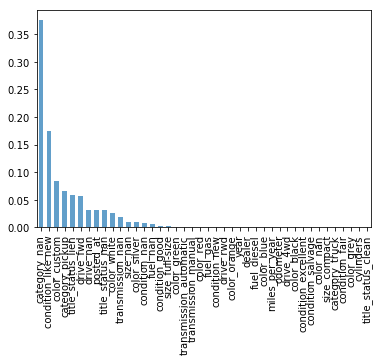

make: ford, model: f-150
0.818570962053


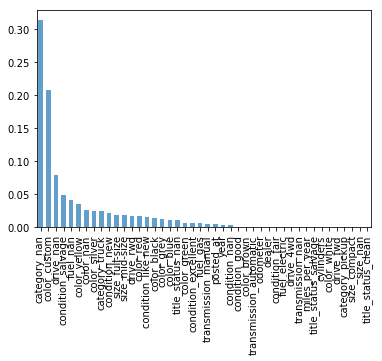

make: ford, model: edge
0.243357916504


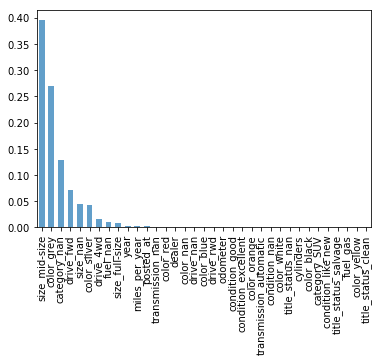

make: mazda, model: 6
0.0669812659472


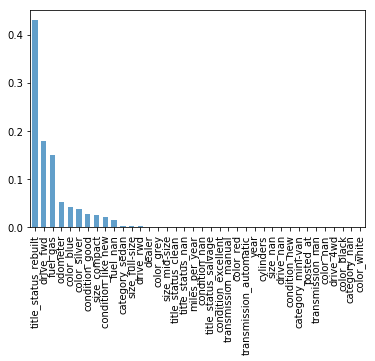

make: mazda, model: 3
0.523156825495


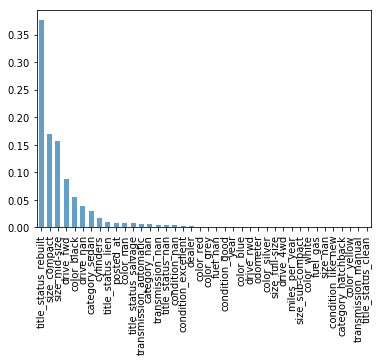

make: mazda, model: 5
-1.10291429795


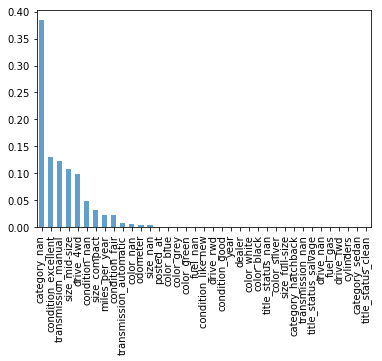

make: mazda, model: miata
-0.0369378883266


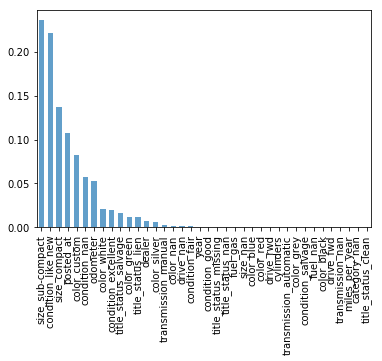

make: infiniti, model: g35
-0.213290705811


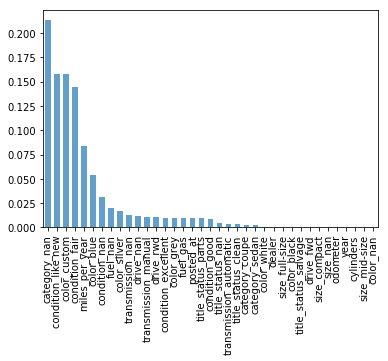

make: infiniti, model: g37
0.454557776526


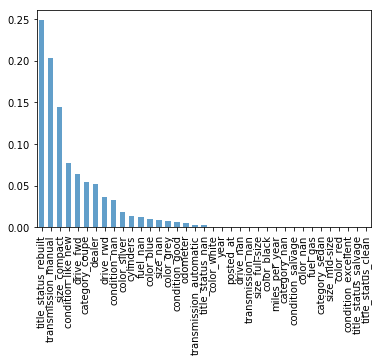

make: bmw, model: 328i
0.850110860115


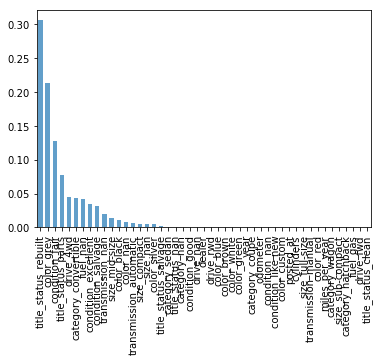

make: bmw, model: 335i
0.507731735066


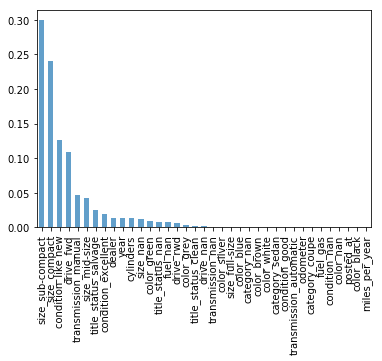

make: bmw, model: 528i
0.748469626133


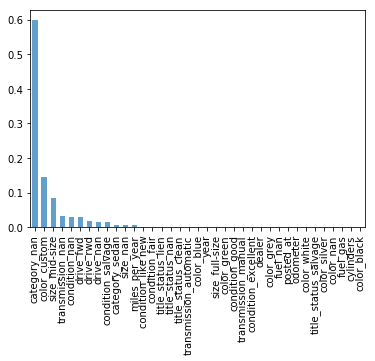

make: bmw, model: z4
-2.44494430564


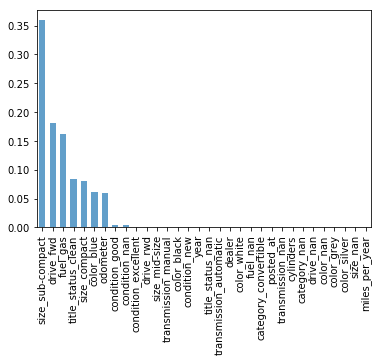

make: bmw, model: 325i
0.521304903336


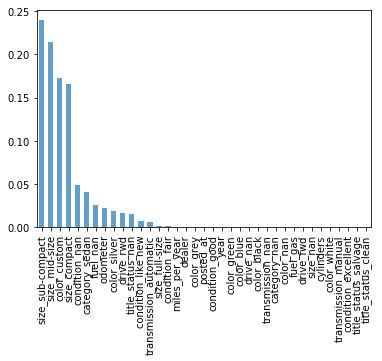

make: bmw, model: 530i
0.224658378678


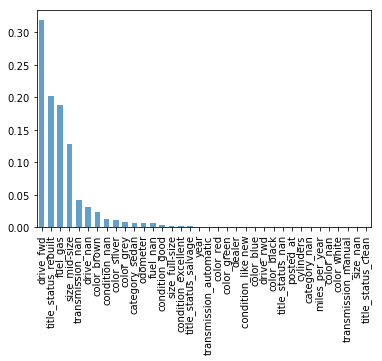

make: bmw, model: m3
0.752178161531


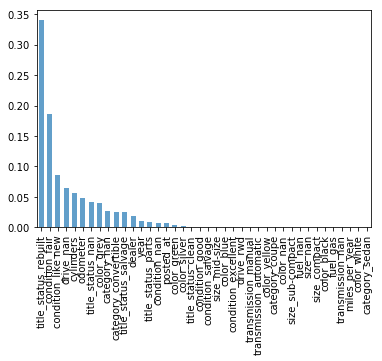

make: bmw, model: 330i
0.0980418979363


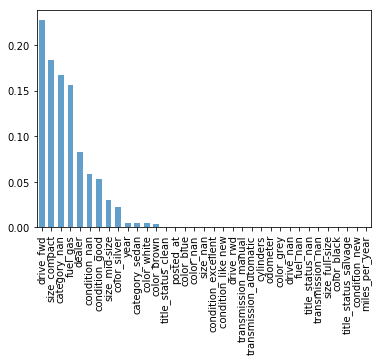

make: bmw, model: x3
0.193826545814


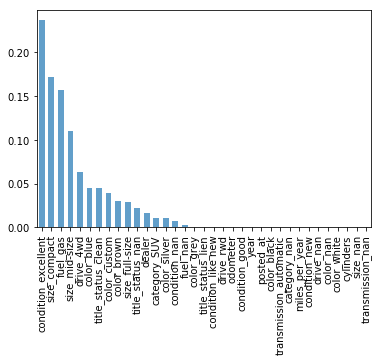

make: bmw, model: x1
-1.16416620261


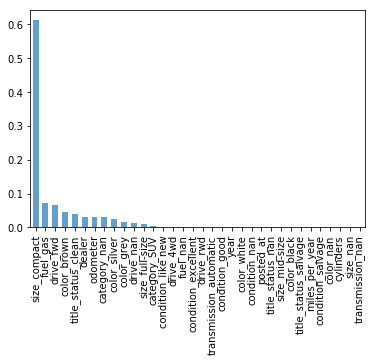

make: bmw, model: x5
0.593341450714


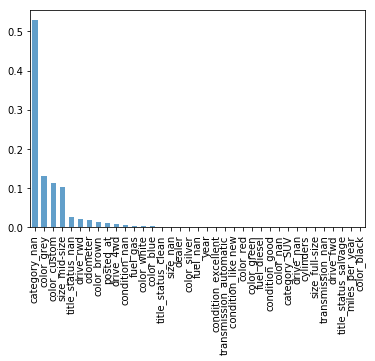

make: bmw, model: 750li
0.728789988452


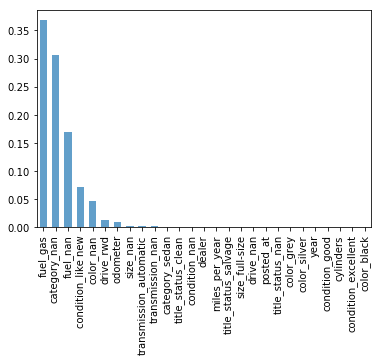

make: bmw, model: m
0.405626559378


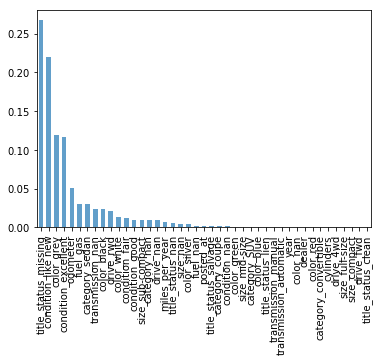

make: bmw, model: 540i
-6.08375256936


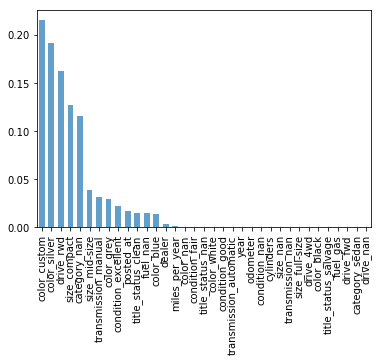

make: bmw, model: 525i
-0.325065390641


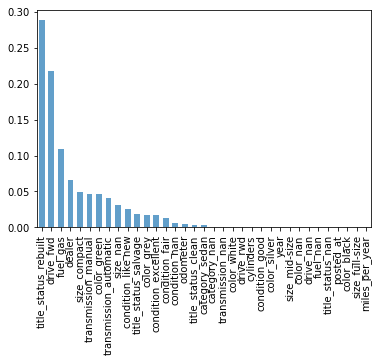

make: bmw, model: 535i
0.780260872823


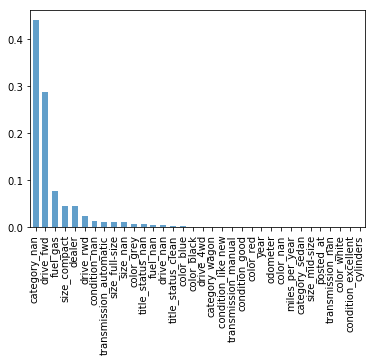

make: land-rover, model: range-rover
0.660342155092


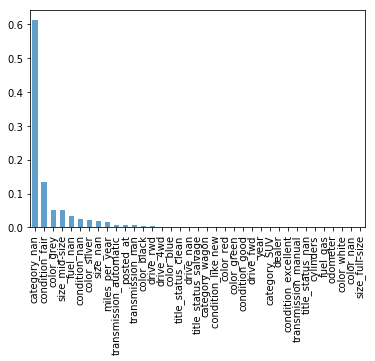

make: mercedes-benz, model: clk
-16.5694320982


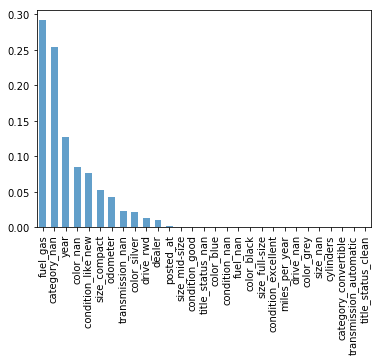

make: mercedes-benz, model: sprinter
0.445694844373


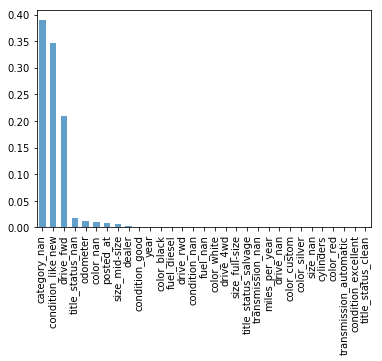

make: mercedes-benz, model: e320
-1.38363736903


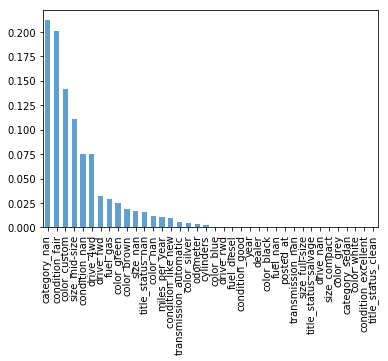

make: mercedes-benz, model: s550
-0.78462825008


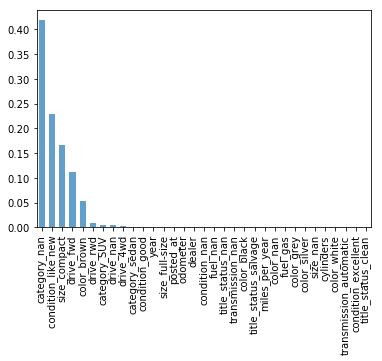

make: mercedes-benz, model: c230
0.3526142767


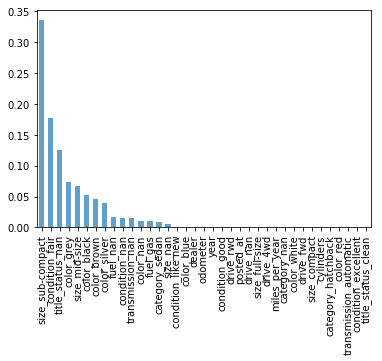

make: mercedes-benz, model: e350
0.471946457273


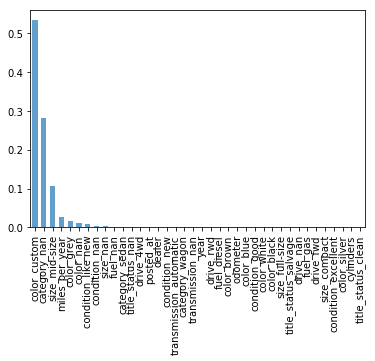

make: mercedes-benz, model: ml350
0.132891867142


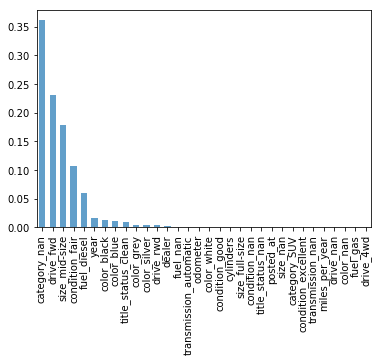

make: mercedes-benz, model: gl450
-1.7165731951


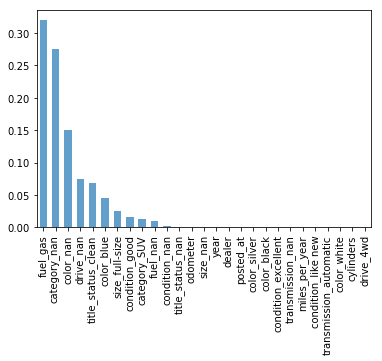

make: mercedes-benz, model: c300
-0.0891673817661


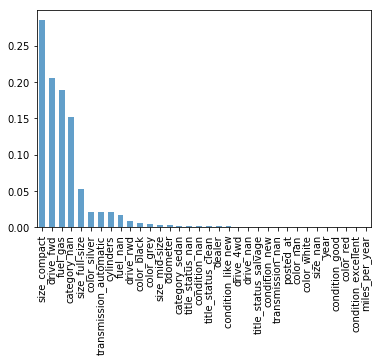

make: mercedes-benz, model: c250
-1.54087703792


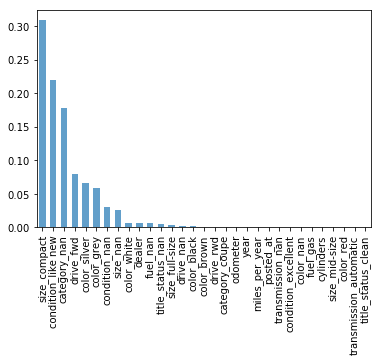

make: mercedes-benz, model: s500
-1.70966913893


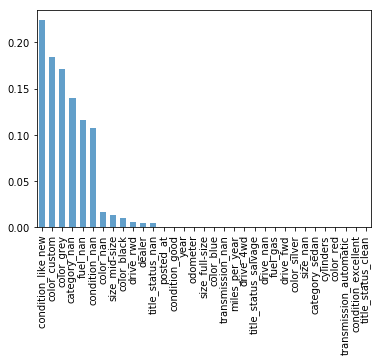

make: mercedes-benz, model: e-class
0.584840530329


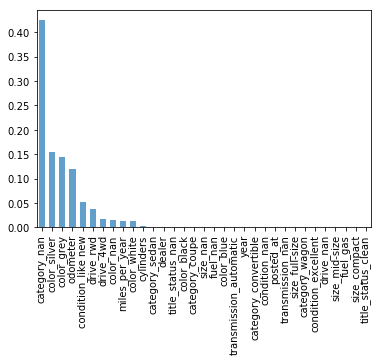

make: volkswagen, model: golf
0.84409006402


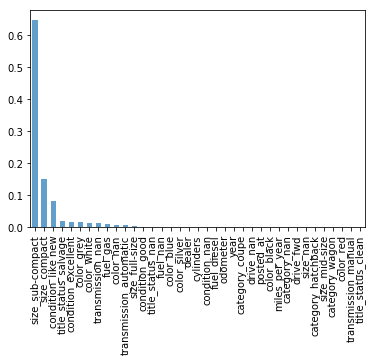

make: volkswagen, model: touareg
0.386676308891


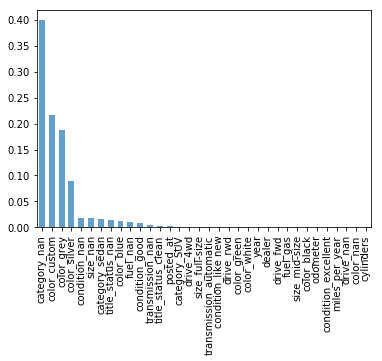

make: volkswagen, model: gti
0.898163070025


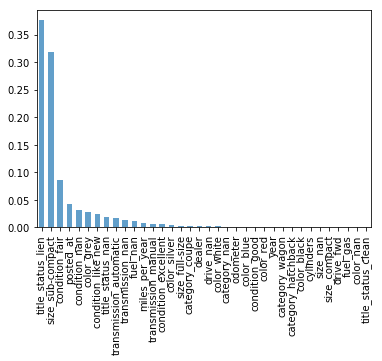

make: volkswagen, model: tiguan
-0.091169860812


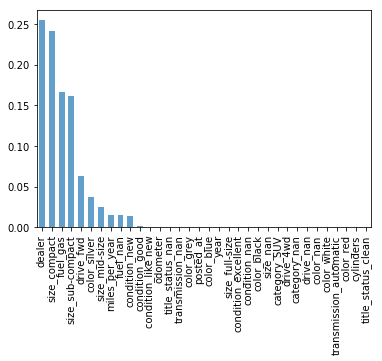

make: volkswagen, model: jetta
0.704179318462


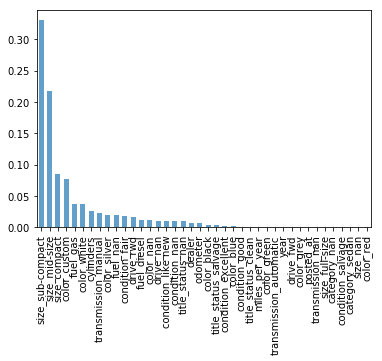

make: volkswagen, model: beetle
0.673122135644


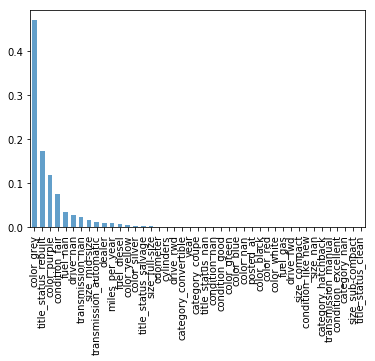

make: volkswagen, model: sedan
0.657153730303


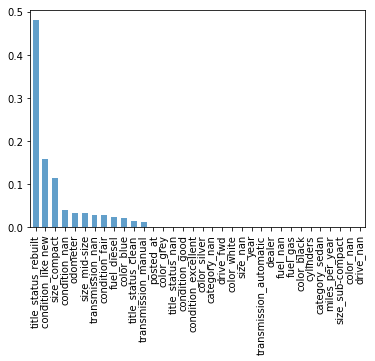

make: volkswagen, model: passat
0.664067646454


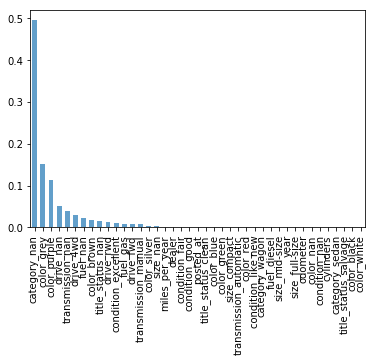

make: fiat, model: 500
-1.50842202252


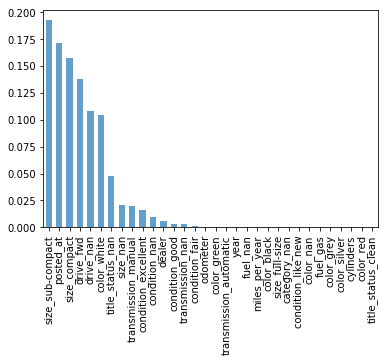

make: lincoln, model: town-car
-2.91394935188


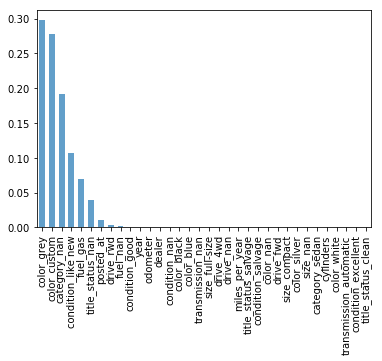

make: lincoln, model: navigator
-0.465286395658


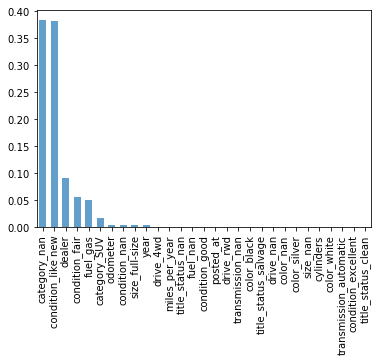

make: acura, model: tsx
0.484615869863


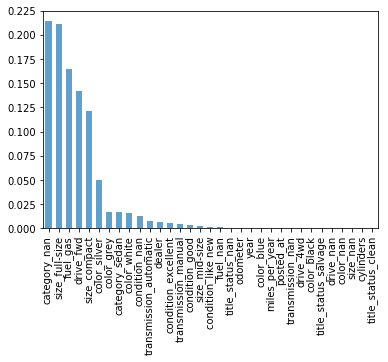

make: acura, model: rdx
0.320368297758


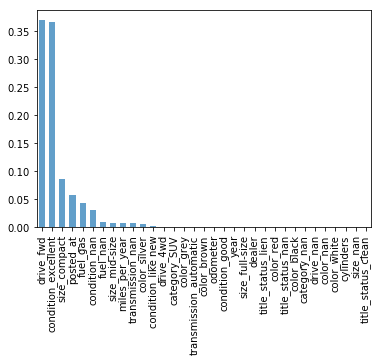

make: acura, model: tl
0.579381135839


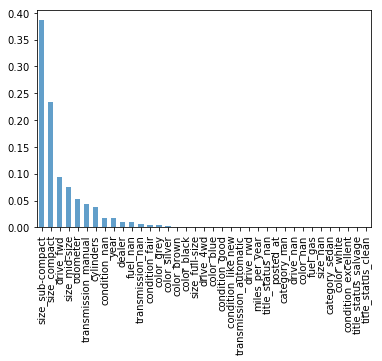

make: acura, model: rsx
0.035398928943


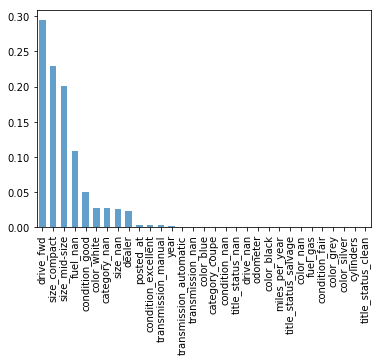

make: acura, model: mdx
0.912207567789


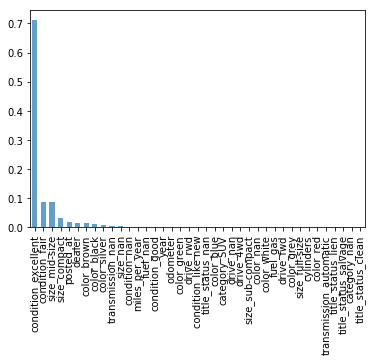

make: acura, model: integra
-1.53448039072


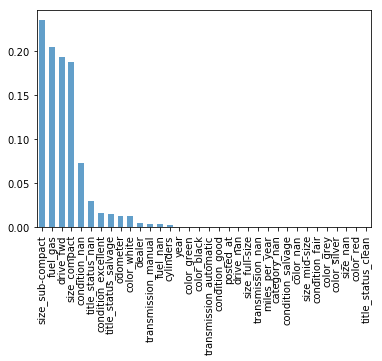

make: dodge, model: caravan
0.315466033763


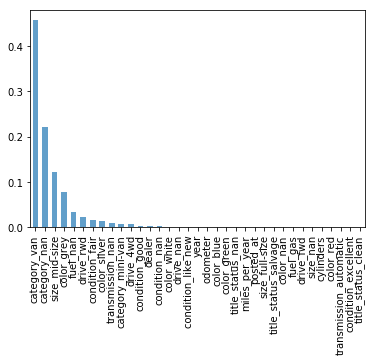

make: dodge, model: ram
0.769724412042


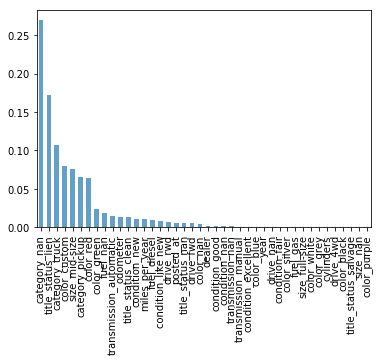

make: dodge, model: durango
0.916515613733


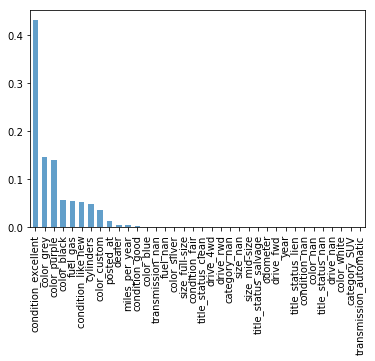

make: dodge, model: challenger
0.279324431683


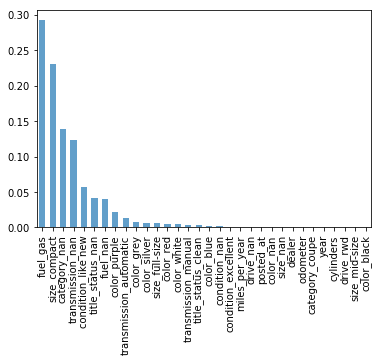

make: dodge, model: charger
0.821415142562


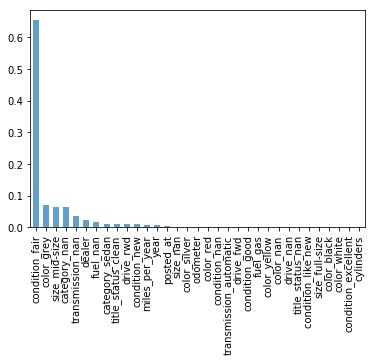

make: dodge, model: dakota
-0.91376798495


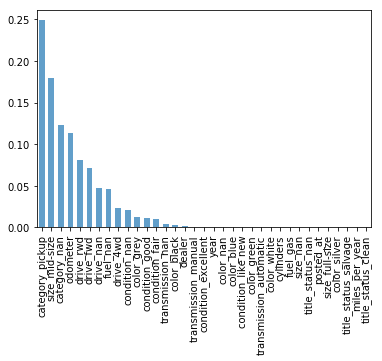

make: nissan, model: 350z
0.529843287765


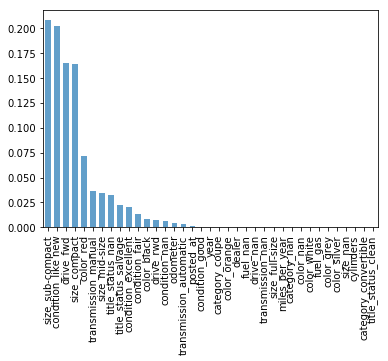

make: nissan, model: pathfinder
0.72292154045


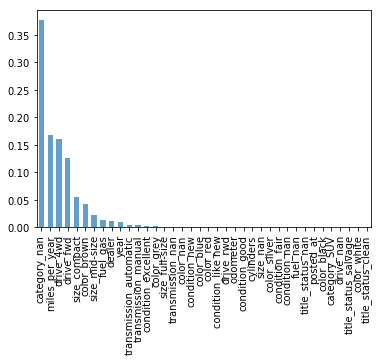

make: nissan, model: frontier
0.54968539515


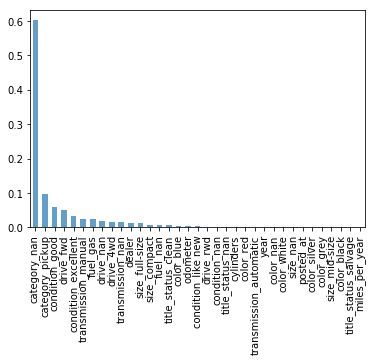

make: nissan, model: murano
0.0956365537601


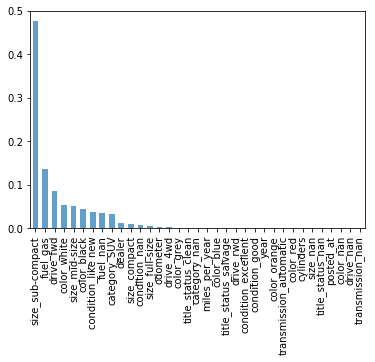

make: nissan, model: versa
0.537549836151


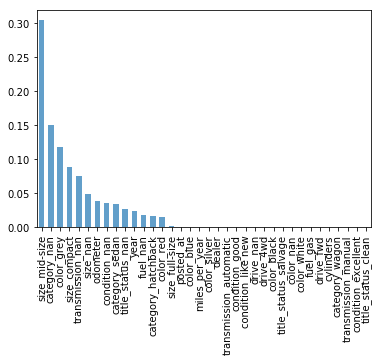

make: nissan, model: rogue
-1.42129754791


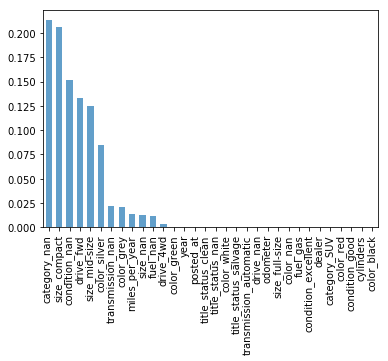

make: nissan, model: altima
0.783124854178


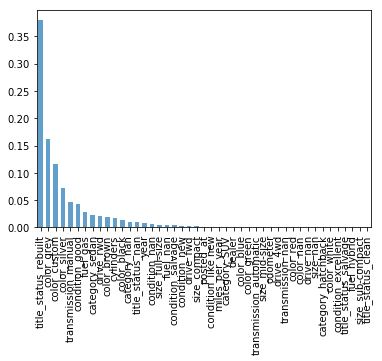

make: nissan, model: quest
-5.34689763246


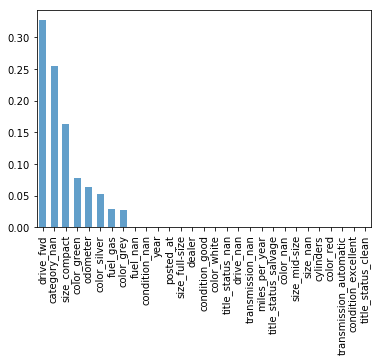

make: nissan, model: xterra
-1.15529403126


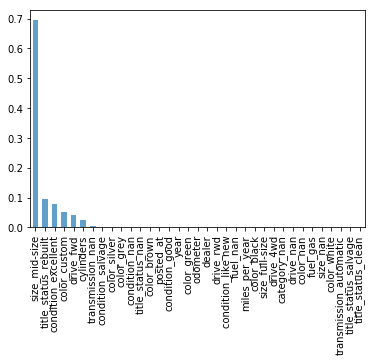

make: nissan, model: sentra
0.789002898001


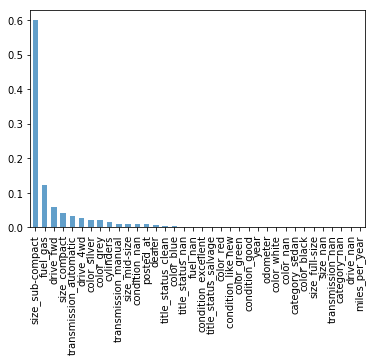

make: nissan, model: truck
-0.341463711893


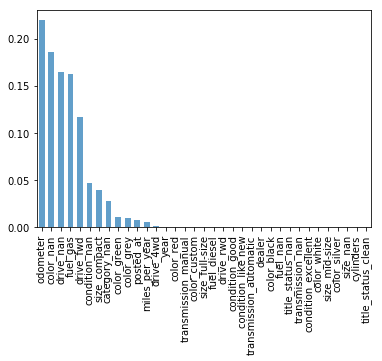

make: nissan, model: maxima
0.432671159006


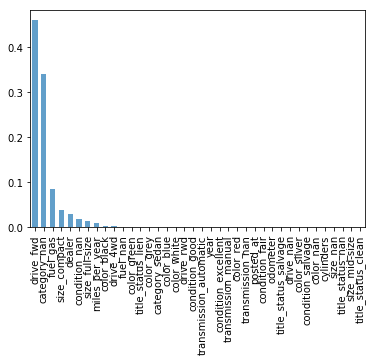

make: toyota, model: highlander
0.842871421909


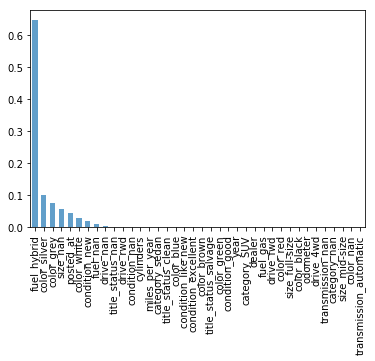

make: toyota, model: sienna
0.629699637988


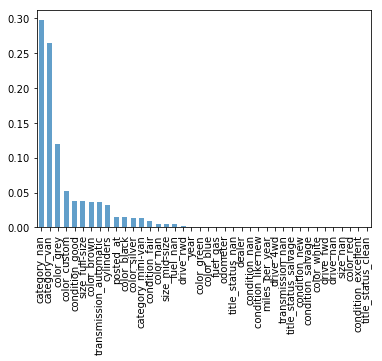

make: toyota, model: tacoma
0.891288645261


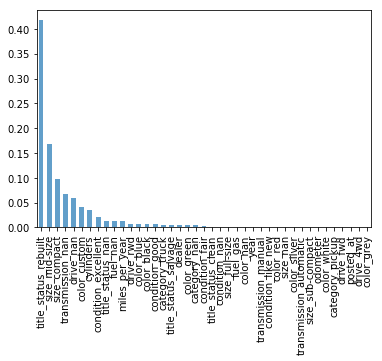

make: toyota, model: matrix
-0.235861533228


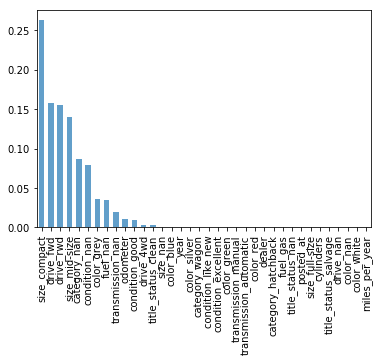

make: toyota, model: prius
0.814532502126


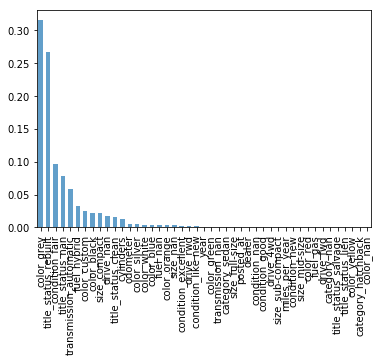

make: toyota, model: rav4
0.874942970291


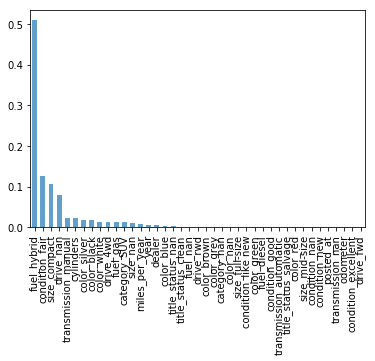

make: toyota, model: tundra
0.630739720283


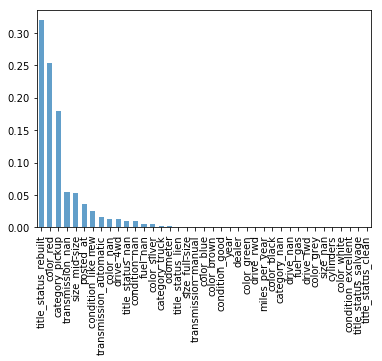

make: toyota, model: avalon
0.791570135941


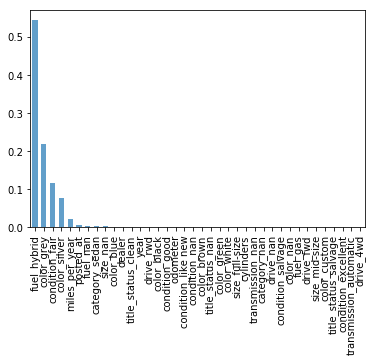

make: toyota, model: 4runner
0.644502115788


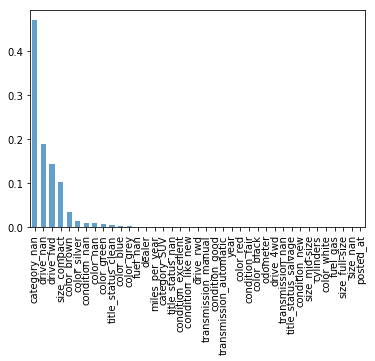

make: toyota, model: sequoia
0.115021522543


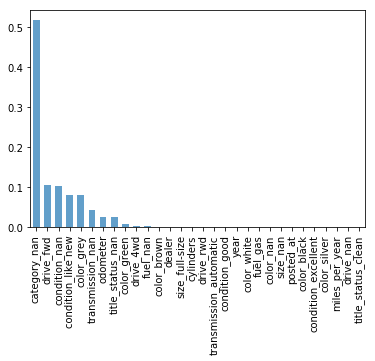

make: toyota, model: camry
0.920133320478


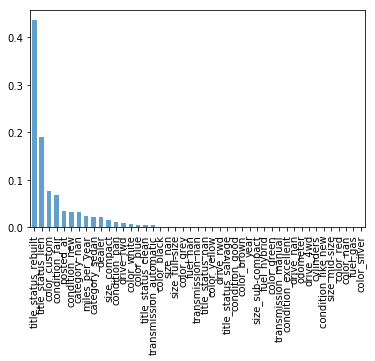

make: toyota, model: corolla
0.867746567926


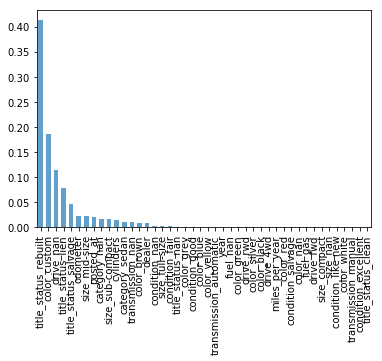

make: toyota, model: yaris
0.306943136116


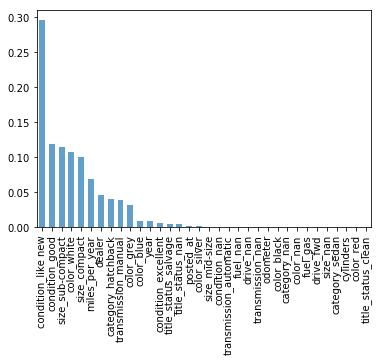

make: toyota, model: land-cruiser
-0.0885465024285


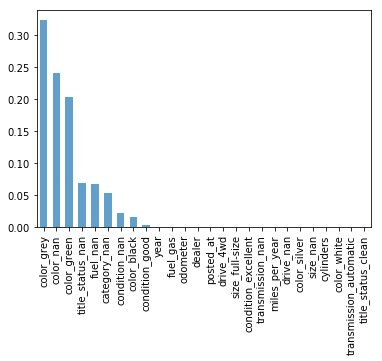

make: volvo, model: v70
-0.341771673947


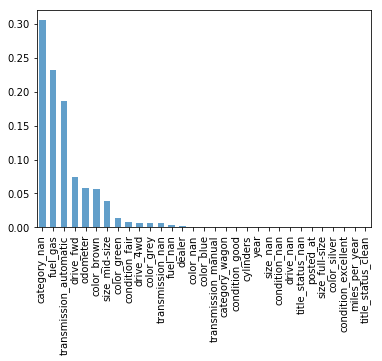

make: volvo, model: s40
-0.0174839563126


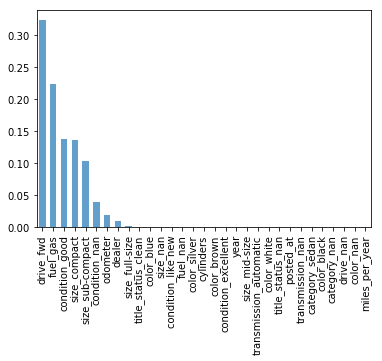

make: volvo, model: xc90
0.235277054488


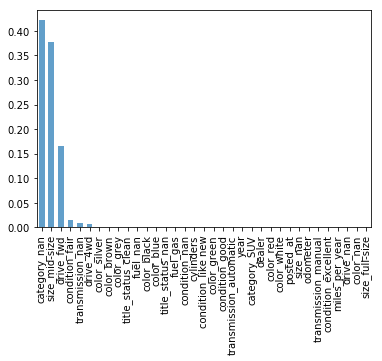

make: volvo, model: s60
0.0371767849228


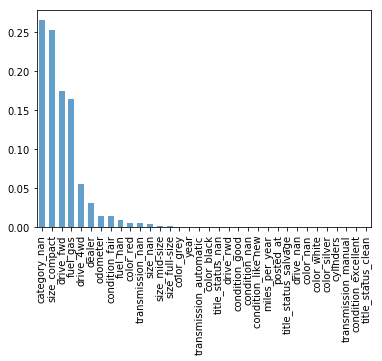

make: jeep, model: wrangler
0.778402428658


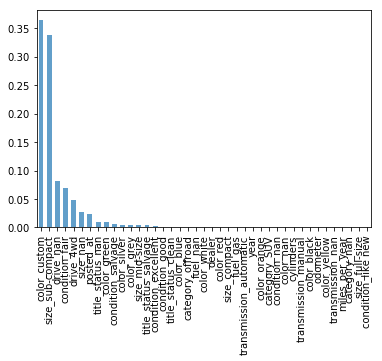

make: jeep, model: cherokee
0.767979637331


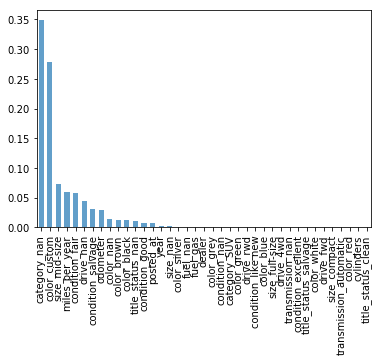

make: jeep, model: patriot
0.280631181341


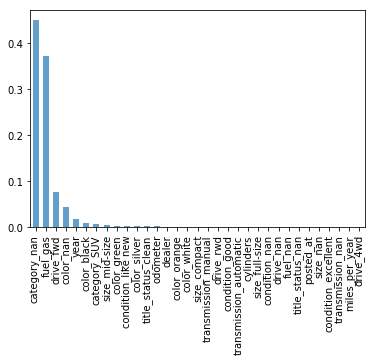

make: jeep, model: liberty
0.479426117168


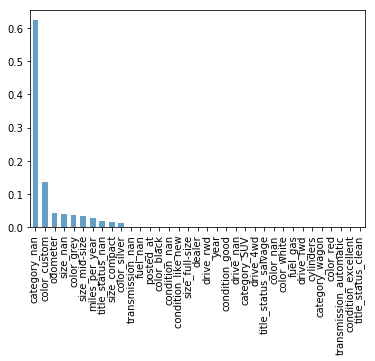

make: chrysler, model: 200
-0.232135255111


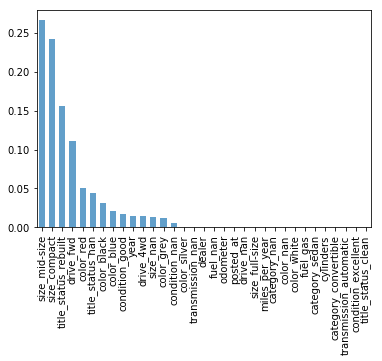

make: chrysler, model: 300c
0.665913672714


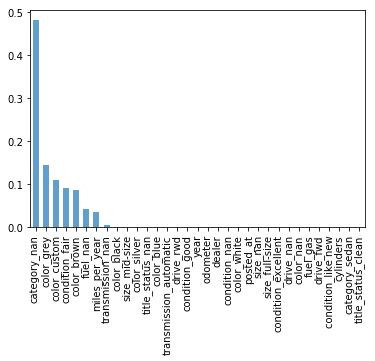

make: chrysler, model: 300
0.418174809009


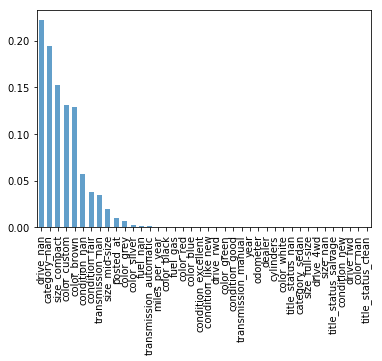

make: chrysler, model: pt-cruiser
-0.259430401736


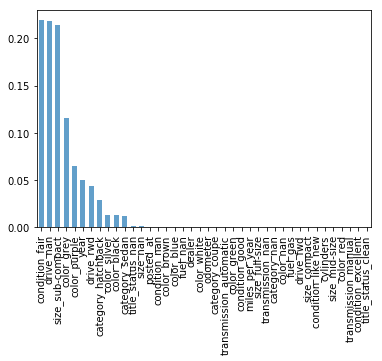

make: chrysler, model: sebring
-1.01237374659


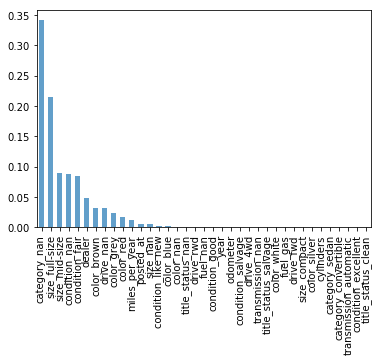

make: mitsubishi, model: eclipse
0.818897574799


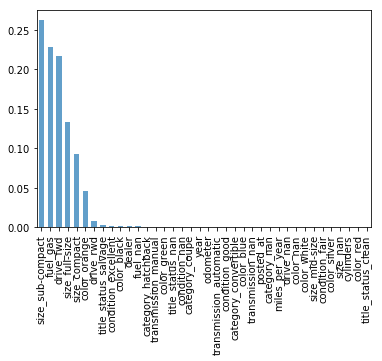

make: mitsubishi, model: lancer
0.392047412766


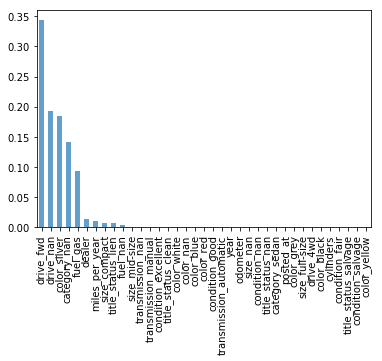

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import neural_network
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from sklearn.preprocessing import normalize    
import json, time
    
def to_ohe(df, excluded):
    categoricals = set()
    for col, col_type in df.dtypes.iteritems():
        if col_type == 'O':
            categoricals.add(col)
        else:
            df[col].fillna(0)
    categoricals = categoricals - set(excluded)
    return pd.get_dummies(df, columns=list(categoricals), dummy_na=True)
    
MIN_NUM = 10
TOP_NUM = 25

make_models = collections.defaultdict(set)
for idx, row in train.iterrows():
    make_models[row['make']].add(row['model'])
    
result = []

for make, models in make_models.items():
    for model in models:
        train_make_model = train[(train['make'] == make) & (train['model'] == model)]
        train_make_model = train_make_model[train_make_model.columns.difference(['make', 'model'])]
        train_make_model = remove_outliers(train_make_model, ['price'])

        #test_make_model = test[(test['make'] == make) & (test['model'] == model)]
        #test_make_model = test_make_model[test_make_model.columns.difference(['make', 'model'])]
        
        if len(train_make_model) > MIN_NUM:
            print("make: %s, model: %s" % (make, model))
            
            train_ohe = to_ohe(train_make_model, ['make', 'model'])
            
            X_train = train_ohe[train_ohe.columns.difference(['price'])]
            
            #X_train_norm = normalize(X_train)
            X_train_norm = X_train # no normalization is better! 
                     
            algorithms = [
                #linear_model.LinearRegression(),
                #linear_model.Ridge(alpha =.1),
                #linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0]),
                #linear_model.Lasso(alpha=.1),
                #linear_model.LassoLars(alpha=.1),
                #linear_model.BayesianRidge(alpha_1=.1, alpha_2=.1),
                #RandomForestRegressor(random_state=1, n_estimators=500, min_samples_split=4, min_samples_leaf=2),
                GradientBoostingRegressor(random_state=10, n_estimators=500, learning_rate=0.01, min_samples_split=4, min_samples_leaf=2, loss='ls'),
                #SVR(kernel='rbf', C=1e3, gamma=0.1),
                #SVR(kernel='poly', C=1e3, degree=2),
                #SVR(kernel='linear', C=1e3),
                #DecisionTreeRegressor(max_depth=5),
                #neural_network.MLPRegressor(max_iter=10000),
            ]

            y_train = train_ohe['price']

            model_columns = list(train_ohe.columns)
            predictors = list(set(model_columns) - set(['price']))
            #print(model_columns)

            #test_ohe = to_ohe(test_make_model, ['make', 'model'])

            #test_ohe = test_ohe.reindex(columns=model_columns, fill_value=0)

            #X_test = test_ohe[test_ohe.columns.difference(['price'])]
            #X_test_norm = normalize(X_test, norm='l2')
            #y_test = test_ohe['price']

            for alg in algorithms:
                alg.fit(X_train_norm, y_train)
                
                file_prefix = '{0}__{1}'.format(make, model.replace('-', '_'))
    
                joblib.dump(alg, 'models/{0}.pkl'.format(file_prefix))
                
                

                #Perform cross-validation:
                score = cross_val_score(alg, X_train_norm, y_train, scoring='r2', cv=3)

                #Print model report:
                print(score.mean())

                #Print Feature Importance:
                features = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
                features.plot.bar(alpha=0.7, width=0.6)
                plt.show()
                
                with open('models/{0}.json'.format(file_prefix), 'w') as fh:
                    fh.write(json.dumps({
                        'r2_score': score.mean(),
                        'feature_importances': zip(predictors, alg.feature_importances_),
                        'size': len(X_train_norm),
                        'make': make,
                        'model': model,
                        'created_at': time.time(),
                    }))
                
                #alg.fit(X_train_norm, y_train)
                #y_pred = alg.predict(X_test_norm)
                # Explained variance score: 1 is perfect prediction
                #print('Variance score: %.2f' % r2_score(y_test, y_pred))
                #scores = cross_val_score(alg, X_train, y_train, scoring='r2', cv=3)
                #print(scores.mean())
                
